# Data Correlation Demo 2 - Hierarchical Cluster

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [2]:
np.set_printoptions(precision = 4, suppress = True)
%matplotlib inline
plt.figure(figsize=(10,3))
plt.style.use('seaborn-whitegrid')


<Figure size 720x216 with 0 Axes>

In [3]:
df = pd.read_csv('mtcars.csv')
df


,cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Date,origin,type
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,01-05-2017,japan,sports
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,02-05-2017,japan,sports
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,03-05-2017,japan,compact
3,Hornet_4_Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,04-05-2017,us,muscle
4,Hornet_Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,05-05-2017,us,wagon
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,06-05-2017,Australia,sedan
6,Duster_360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,07-05-2017,South Africa,suv
7,Merc_240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,08-05-2017,Germany,sedan
8,Merc_230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,09-05-2017,Germany,coupe
9,Merc_280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,10-05-2017,Germany,coupe


In [4]:
x = df.ix[:,(1,3,4,6)].values
x


C:\Users\VIJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[ 21.   , 160.   , 110.   ,   2.62 ],
       [ 21.   , 160.   , 110.   ,   2.875],
       [ 22.8  , 108.   ,  93.   ,   2.32 ],
       [ 21.4  , 258.   , 110.   ,   3.215],
       [ 18.7  , 360.   , 175.   ,   3.44 ],
       [ 18.1  , 225.   , 105.   ,   3.46 ],
       [ 14.3  , 360.   , 245.   ,   3.57 ],
       [ 24.4  , 146.7  ,  62.   ,   3.19 ],
       [ 22.8  , 140.8  ,  95.   ,   3.15 ],
       [ 19.2  , 167.6  , 123.   ,   3.44 ],
       [ 17.8  , 167.6  , 123.   ,   3.44 ],
       [ 16.4  , 275.8  , 180.   ,   4.07 ],
       [ 17.3  , 275.8  , 180.   ,   3.73 ],
       [ 15.2  , 275.8  , 180.   ,   3.78 ],
       [ 10.4  , 472.   , 205.   ,   5.25 ],
       [ 10.4  , 460.   , 215.   ,   5.424],
       [ 14.7  , 440.   , 230.   ,   5.345],
       [ 32.4  ,  78.7  ,  66.   ,   2.2  ],
       [ 30.4  ,  75.7  ,  52.   ,   1.615],
       [ 33.9  ,  71.1  ,  65.   ,   1.835],
       [ 21.5  , 120.1  ,  97.   ,   2.465],
       [ 15.5  , 318.   , 150.   ,   3.52 ],
       [ 1

In [5]:
y = df.ix[:,(9)].values
y


C:\Users\VIJAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

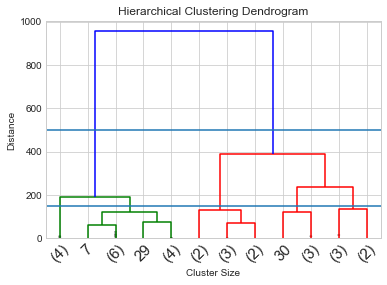

In [6]:
z = linkage(x,'ward')
dendrogram (z, truncate_mode ='lastp', p = 12, leaf_rotation = 45., leaf_font_size = 15., show_contracted = True)
plt.title ('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()


In [7]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
Hclustering.fit(x)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000001B9829971E0>)

In [8]:
sm.accuracy_score(y, Hclustering.labels_)


0.78125

# End of Data Correlation Demo 2